<h1><center>Tutorial 5 : Social Network Analysis</center></h1>

In this tutorial we are using NetworkX, If you are working with Anaconda you can use the folowing command to install 'NetworkX' module:
### conda install -c anaconda networkx

In [1]:
#import librairies:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings; warnings.simplefilter('ignore')

### Network Basics:
* Nodes: The individuals whose network we are building.
* Edges: The connection between the nodes. It represents a relationship between the nodes of the network.

## 1- Undirected Network

In [2]:
#This network is a group of people who are friends in Facebook.
#This is called a symmetric network because the relationship “friendship” is a symmetric relationship: 
#If A is related to B, B is also related to A.

G_symmetric = nx.Graph()

G_symmetric.add_edge('Karim',  'Laura')
G_symmetric.add_edge('Karim',  'Marc')
G_symmetric.add_edge('Karim',  'John')
G_symmetric.add_edge('Karim',  'Sam')
G_symmetric.add_edge('Laura',   'Sam')
G_symmetric.add_edge('Sam','Marc')
G_symmetric.add_edge('George',  'John')

In [3]:
#print the network info
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333


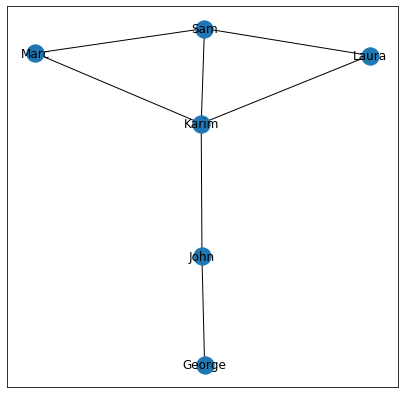

In [4]:
#Visualize the network
plt.figure(figsize=(7,7))
nx.draw_networkx(G_symmetric);

## 2- Directed Network

In [5]:
#What if the relationship between nodes is ‘child of’, then the relationship is no longer symmetric. 
#This is the case if someone follows someone else on Twitter. 
#If A is the child of B, then B is not a child of A.
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('Sam','Karim')
G_asymmetric.add_edge('Sam','John')
G_asymmetric.add_edge('Laura','Sam')
G_asymmetric.add_edge('George','Sam')

In [6]:
#print the network info
print(nx.info(G_asymmetric))

Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 4
Average in degree:   0.8000
Average out degree:   0.8000


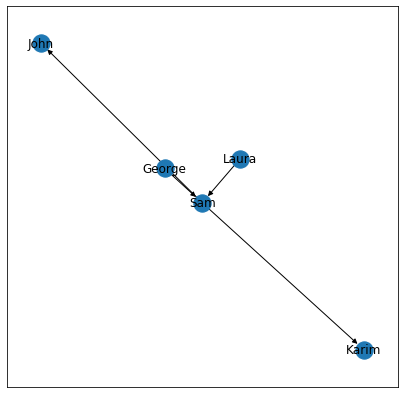

In [7]:
# To make sure that all nodes are distinctly visible in the network, use the spring_layout() function, followed by the draw_networkx() function.
plt.figure(figsize=(7,7))
#nodes position
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

## 3- Weighted Network

In [8]:
#let create again friendship network , but this time we add weight to the network, 
#each edge has a weight signifying the number of commun friend.
G_weighted = nx.Graph()

G_weighted.add_edge('Karim',  'Laura', weight= 25)
G_weighted.add_edge('Karim',  'Marc', weight= 8)
G_weighted.add_edge('Karim',  'John', weight= 9)
G_weighted.add_edge('Karim',  'Sam', weight= 1)
G_weighted.add_edge('Laura',  'Sam', weight= 2)
G_weighted.add_edge('Sam'  ,  'Marc', weight= 2)
G_weighted.add_edge('George', 'John', weight= 7)


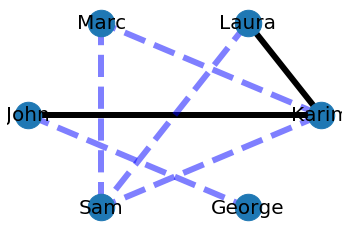

In [9]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

## 4-Clustering coefficient

In [10]:
#It is observed that people who share connections in a social network tend to form associations. 

#We can determine the clusters of a node, local clustering coefficient,
#which is the fraction of pairs of the node’s friends (that is connections) that are connected with each other.

#To determine the local clustering coefficient:
nx.clustering(G_symmetric)

{'Karim': 0.3333333333333333,
 'Laura': 1.0,
 'Marc': 1.0,
 'John': 0,
 'Sam': 0.6666666666666666,
 'George': 0}

In [11]:
#The average clustering coefficient (sum of all the local clustering coefficients divided by the number of nodes)
nx.average_clustering(G_symmetric)

0.49999999999999994

## 5- Network Distance Measures

### Degree
Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

In [12]:
#For all nodes in the network
nx.degree(G_symmetric)

DegreeView({'Karim': 4, 'Laura': 2, 'Marc': 2, 'John': 2, 'Sam': 3, 'George': 1})

In [13]:
#For specific node
nx.degree(G_symmetric,'Karim')

4

### Distance
We can also determine the shortest path between two nodes and its length in NetworkX using nx.shortest_path(Graph, Node1, Node2) and nx.shortest_path_length(Graph, Node1, Node2) functions respectively.

In [14]:
nx.shortest_path(G_symmetric)

{'Karim': {'Karim': ['Karim'],
  'Laura': ['Karim', 'Laura'],
  'Marc': ['Karim', 'Marc'],
  'John': ['Karim', 'John'],
  'Sam': ['Karim', 'Sam'],
  'George': ['Karim', 'John', 'George']},
 'Laura': {'Laura': ['Laura'],
  'Karim': ['Laura', 'Karim'],
  'Sam': ['Laura', 'Sam'],
  'Marc': ['Laura', 'Karim', 'Marc'],
  'John': ['Laura', 'Karim', 'John'],
  'George': ['Laura', 'Karim', 'John', 'George']},
 'Marc': {'Marc': ['Marc'],
  'Karim': ['Marc', 'Karim'],
  'Sam': ['Marc', 'Sam'],
  'Laura': ['Marc', 'Karim', 'Laura'],
  'John': ['Marc', 'Karim', 'John'],
  'George': ['Marc', 'Karim', 'John', 'George']},
 'John': {'John': ['John'],
  'Karim': ['John', 'Karim'],
  'George': ['John', 'George'],
  'Laura': ['John', 'Karim', 'Laura'],
  'Marc': ['John', 'Karim', 'Marc'],
  'Sam': ['John', 'Karim', 'Sam']},
 'Sam': {'Sam': ['Sam'],
  'Karim': ['Sam', 'Karim'],
  'Laura': ['Sam', 'Laura'],
  'Marc': ['Sam', 'Marc'],
  'John': ['Sam', 'Karim', 'John'],
  'George': ['Sam', 'Karim', 'John', 

In [15]:
nx.shortest_path(G_symmetric,'Karim','George')

['Karim', 'John', 'George']

In [16]:
nx.shortest_path_length(G_symmetric,'Karim','George')

2

### Eccentricity
Eccentricity of a node A is defined as the largest distance between A and all other nodes.

In [17]:
nx.eccentricity(G_symmetric)

{'Karim': 2, 'Laura': 3, 'Marc': 3, 'John': 2, 'Sam': 3, 'George': 3}

In [18]:
# For a specific node
nx.eccentricity(G_symmetric,'Laura')

3

## 6- Centrality measures

### Degree Centrality
The people most popular or more liked usually are the ones who have more friends.
Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. 

In [19]:
nx.degree_centrality(G_symmetric)

{'Karim': 0.8,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Sam': 0.6000000000000001,
 'George': 0.2}

### Eigenvector Centrality
Eigenvector centrality is a measure of how import a node is by accounting for the fact of how well it is connected to other important nodes.

In [20]:
nx.eigenvector_centrality(G_symmetric)

{'Karim': 0.5811550671635158,
 'Laura': 0.4047813009326468,
 'Marc': 0.4047813009326468,
 'John': 0.2487858900684301,
 'Sam': 0.5140166145184832,
 'George': 0.0919537146750121}

### Closeness Centrality
Closeness Centrality is a measure where each node’s importance is determined by closeness to all other nodes.

In [21]:
nx.closeness_centrality(G_symmetric)

{'Karim': 0.8333333333333334,
 'Laura': 0.5555555555555556,
 'Marc': 0.5555555555555556,
 'John': 0.625,
 'Sam': 0.625,
 'George': 0.4166666666666667}

### Betweenness Centrality
The nodes with high betweenness centrality play a significant role in the communication/information flow within the network.
The nodes with high betweenness centrality can have a strategic control and influence on others. 

In [22]:
nx.betweenness_centrality(G_symmetric)

{'Karim': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.4,
 'Sam': 0.05,
 'George': 0.0}

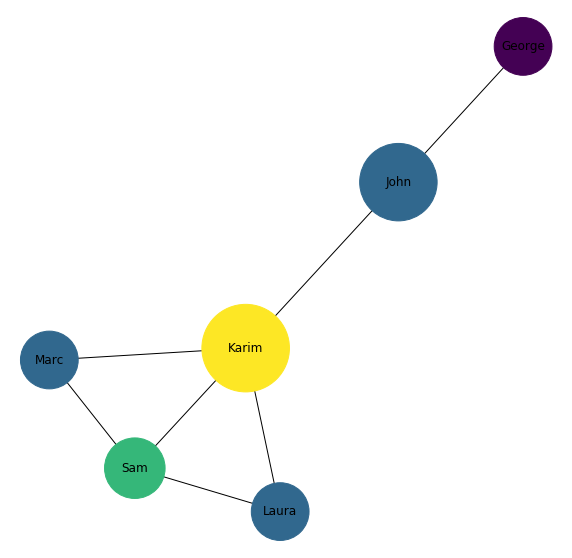

In [23]:
## Changing the size and the color of nodes according to the betweenness and degree respectively
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [24]:
## Ref1:  https://www.kirenz.com/post/2019-08-13-network_analysis/#social-network-analysis-with-networkx-in-python
## Ref2:  https://networkx.github.io/documentation/networkx-1.10/tutorial/tutorial.html  
## Ref3:  https://networkx.github.io/documentation/networkx-1.9/reference/drawing.html